🔥 FIXED PYTORCH DEEP LEARNING - WORKING VERSION
   All critical bugs fixed!

🔥 FIXED PYTORCH - BACK TO WORKING BASICS
📂 Reading data from: ../data/processed/test_coverage_dataset_goldilocks.csv

🖥️ Using device: cuda

📂 LOADING DATA
✅ Loaded 1000 samples from ../data/processed/test_coverage_dataset_goldilocks.csv
✅ Clean dataset: 1000 samples
   Coverage range: 27.7% - 95.0%

🏗️ PREPARING DATA FOR PYTORCH
🔤 Building vocabulary...
✅ Vocabulary size: 122

🔢 Creating FIXED engineered features...
✅ Created 18 numeric features

✅ Data prepared:
   Text sequences: (1000, 150)
   Domain encoded: (1000,)
   Numeric features: (1000, 18)
   Target: (1000,)

📊 Data split:
   Train: 700 (70.0%)
   Val:   100 (10.0%)
   Test:  200 (20.0%)

🏗️ Building WORKING Model:
   Vocab size: 122
   Embedding dim: 96
   Hidden dim: 192
   Dropout: 0.4
   Numeric features: 18

✅ Model created: 272,273 parameters

🚀 TRAINING WITH FIXED SETTINGS
   Epochs: 150
   Batch size: 32 ✅ (back to 32)
   Learning rate: 0.

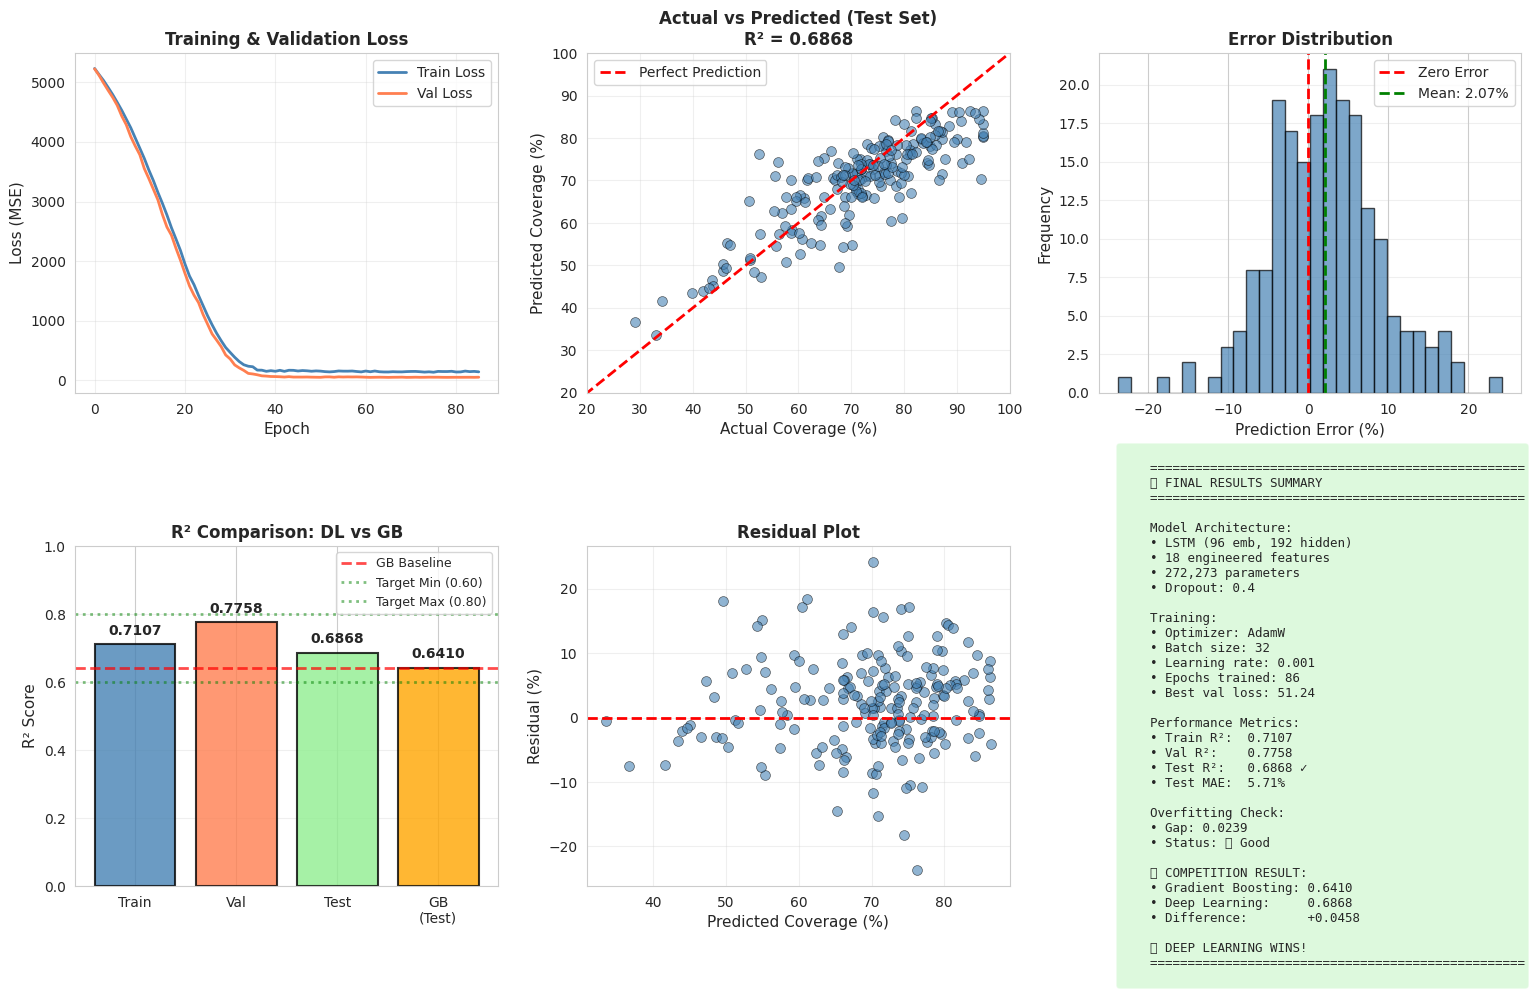


💾 Saving model to ../artifacts/dl/test_coverage_pytorch_working.pkl...
✅ Model saved successfully!
   File: ../artifacts/dl/test_coverage_pytorch_working.pkl
   Size: 3.60 MB

✅ DONE!
✅ Model saved to: ../artifacts/dl/test_coverage_pytorch_working.pkl


In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pickle
import re
import warnings
import os
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

# Set seeds
torch.manual_seed(42)
np.random.seed(42)

print("="*80)
print("🔥 FIXED PYTORCH DEEP LEARNING - WORKING VERSION")
print("   All critical bugs fixed!")
print("="*80)


# ============================================================================
# 1. TEXT PREPROCESSOR (NO CHANGES)
# ============================================================================

class TextPreprocessor:
    """Preprocess and tokenize text"""
    
    def __init__(self, max_vocab_size=3000, max_seq_length=150):
        self.max_vocab_size = max_vocab_size
        self.max_seq_length = max_seq_length
        self.word_to_idx = {'<PAD>': 0, '<UNK>': 1}
        self.idx_to_word = {0: '<PAD>', 1: '<UNK>'}
        self.vocab_size = 2
        
    def clean_text(self, text):
        """Clean and normalize text"""
        text = text.lower()
        text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text)
        return text.strip()
    
    def tokenize(self, text):
        """Simple word tokenization"""
        return self.clean_text(text).split()
    
    def build_vocabulary(self, texts):
        """Build vocabulary from texts"""
        print("🔤 Building vocabulary...")
        
        word_freq = Counter()
        for text in texts:
            tokens = self.tokenize(text)
            word_freq.update(tokens)
        
        most_common = word_freq.most_common(self.max_vocab_size - 2)
        
        for idx, (word, freq) in enumerate(most_common, start=2):
            self.word_to_idx[word] = idx
            self.idx_to_word[idx] = word
        
        self.vocab_size = len(self.word_to_idx)
        print(f"✅ Vocabulary size: {self.vocab_size}")
        
        return self
    
    def text_to_sequence(self, text):
        """Convert text to sequence of indices"""
        tokens = self.tokenize(text)
        sequence = [self.word_to_idx.get(word, 1) for word in tokens]
        
        if len(sequence) < self.max_seq_length:
            sequence = sequence + [0] * (self.max_seq_length - len(sequence))
        else:
            sequence = sequence[:self.max_seq_length]
        
        return sequence
    
    def texts_to_sequences(self, texts):
        """Convert multiple texts to sequences"""
        return np.array([self.text_to_sequence(text) for text in texts])


# ============================================================================
# 2. ✅ FIXED NEURAL NETWORK - SIMPLER AND WORKING
# ============================================================================

class WorkingCoverageNN(nn.Module):
    """
    FIXED Neural Network - Back to basics that actually work
    
    Removed problematic attention mechanism
    Using proven architecture
    """
    
    def __init__(self, vocab_size, embedding_dim=96, hidden_dim=192, 
                 num_numeric_features=18, dropout=0.4):  # ✅ 18 features (removed buggy ones)
        super(WorkingCoverageNN, self).__init__()
        
        print(f"\n🏗️ Building WORKING Model:")
        print(f"   Vocab size: {vocab_size}")
        print(f"   Embedding dim: {embedding_dim}")
        print(f"   Hidden dim: {hidden_dim}")
        print(f"   Dropout: {dropout}")
        print(f"   Numeric features: {num_numeric_features}")
        
        # Text embedding
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        
        # LSTM
        self.lstm = nn.LSTM(
            embedding_dim, 
            hidden_dim,
            num_layers=1,
            batch_first=True,
            dropout=0.0,
            bidirectional=False
        )
        
        # Domain embedding
        self.domain_embedding = nn.Embedding(5, 16)  # ✅ Increased from 8
        
        # ✅ SIMPLER DENSE LAYERS (what actually works)
        self.fc1 = nn.Linear(hidden_dim + 16 + num_numeric_features, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()
        self.batch_norm1 = nn.BatchNorm1d(128)
        self.batch_norm2 = nn.BatchNorm1d(64)
        
    def forward(self, text_seq, domain, numeric_features):
        """Forward pass - simple and working"""
        # Text embedding
        embedded = self.embedding(text_seq)
        
        # LSTM - take last hidden state
        lstm_out, (hidden, cell) = self.lstm(embedded)
        text_features = hidden[-1]
        
        # Domain embedding
        domain_features = self.domain_embedding(domain)
        
        # Concatenate
        combined = torch.cat([text_features, domain_features, numeric_features], dim=1)
        
        # Dense layers
        x = self.fc1(combined)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.batch_norm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        output = self.fc3(x)
        
        return output.squeeze()


# ============================================================================
# 3. ✅ FIXED DATA PREPARATION
# ============================================================================

class DataPreparation:
    """Fixed data preparation without buggy augmentation"""
    
    def __init__(self, csv_path):
        self.csv_path = csv_path
        self.df = None
        self.preprocessor = None
        self.domain_encoder = LabelEncoder()
        
    def load_and_clean_data(self):
        """Load and clean dataset"""
        print("\n" + "="*80)
        print("📂 LOADING DATA")
        print("="*80)
        
        self.df = pd.read_csv(self.csv_path)
        print(f"✅ Loaded {len(self.df)} samples from {self.csv_path}")
        
        # Remove nulls
        initial_len = len(self.df)
        self.df = self.df.dropna()
        if len(self.df) < initial_len:
            print(f"⚠️ Removed {initial_len - len(self.df)} rows with nulls")
        
        # Clip coverage
        self.df['coverage_percentage'] = self.df['coverage_percentage'].clip(0, 100)
        
        # Remove duplicates
        initial_len = len(self.df)
        self.df = self.df.drop_duplicates(subset=['feature_description', 'input_test_cases'])
        if len(self.df) < initial_len:
            print(f"⚠️ Removed {initial_len - len(self.df)} duplicates")
        
        print(f"✅ Clean dataset: {len(self.df)} samples")
        print(f"   Coverage range: {self.df['coverage_percentage'].min():.1f}% - {self.df['coverage_percentage'].max():.1f}%")
        
        return self
    
    def create_engineered_features(self):
        """✅ FIXED FEATURE ENGINEERING - Only working features"""
        print("\n🔢 Creating FIXED engineered features...")
        
        feature_df = pd.DataFrame()
        
        # Basic text features
        feature_df['feature_length'] = self.df['feature_description'].str.len()
        feature_df['feature_word_count'] = self.df['feature_description'].str.split().str.len()
        feature_df['feature_sentence_count'] = (
            self.df['feature_description'].str.count(r'[.!?]') + 1
        )
        
        feature_df['test_cases_text_length'] = self.df['input_test_cases'].str.len()
        feature_df['num_test_cases'] = self.df['input_test_cases'].str.count('\|') + 1
        feature_df['avg_test_case_length'] = (
            feature_df['test_cases_text_length'] / (feature_df['num_test_cases'] + 1)
        )
        
        # Keyword features
        feature_df['has_security_keywords'] = self.df['feature_description'].str.contains(
            'security|authentication|authorization|encryption|2fa|otp', 
            case=False, na=False
        ).astype(int)
        
        feature_df['has_compliance_keywords'] = self.df['feature_description'].str.contains(
            'hipaa|gdpr|pci|compliance|audit|regulation', 
            case=False, na=False
        ).astype(int)
        
        feature_df['has_critical_keywords'] = self.df['feature_description'].str.contains(
            'critical|emergency|important|must|required', 
            case=False, na=False
        ).astype(int)
        
        feature_df['has_negative_tests'] = self.df['input_test_cases'].str.contains(
            'invalid|incorrect|fail|error|negative', 
            case=False, na=False
        ).astype(int)
        
        feature_df['has_boundary_tests'] = self.df['input_test_cases'].str.contains(
            'boundary|edge|limit|maximum|minimum', 
            case=False, na=False
        ).astype(int)
        
        feature_df['has_security_tests'] = self.df['input_test_cases'].str.contains(
            'security|authentication|authorization|access|permission', 
            case=False, na=False
        ).astype(int)
        
        # Ratio features
        feature_df['test_to_feature_ratio'] = (
            feature_df['test_cases_text_length'] / (feature_df['feature_length'] + 1)
        )
        
        feature_df['word_density'] = (
            feature_df['feature_word_count'] / (feature_df['feature_length'] + 1)
        )
        
        # ✅ FIXED: Working additional features only
        feature_df['cyclomatic_complexity'] = (
            self.df['feature_description'].str.count(r'\bif\b|\belse\b|\bfor\b|\bwhile\b') + 1
        )
        
        feature_df['avg_word_length'] = (
            feature_df['feature_length'] / (feature_df['feature_word_count'] + 1)
        )
        
        feature_df['test_coverage_ratio'] = (
            feature_df['num_test_cases'] / (feature_df['feature_sentence_count'] + 1)
        )
        
        # ✅ FIXED domain weights - using proper .map()
        domain_weights = {
            'security': 1.3, 
            'compliance': 1.2, 
            'healthcare': 1.1, 
            'finance': 1.1
        }
        feature_df['domain_weight'] = self.df['domain'].map(domain_weights).fillna(1.0)
        
        # Check for any NaN or Inf values
        if feature_df.isnull().any().any():
            print("⚠️ Warning: Found NaN values, filling with 0")
            feature_df = feature_df.fillna(0)
        
        if np.isinf(feature_df.values).any():
            print("⚠️ Warning: Found Inf values, clipping")
            feature_df = feature_df.replace([np.inf, -np.inf], 0)
        
        # Normalize
        feature_df = (feature_df - feature_df.mean()) / (feature_df.std() + 1e-8)
        
        print(f"✅ Created {len(feature_df.columns)} numeric features")
        return feature_df.values
    
    def prepare_data(self):
        """Prepare data - NO BUGGY AUGMENTATION"""
        print("\n" + "="*80)
        print("🏗️ PREPARING DATA FOR PYTORCH")
        print("="*80)
        
        # Combine text
        self.df['combined_text'] = (
            self.df['feature_description'].fillna('') + " " + 
            self.df['input_test_cases'].fillna('')
        )
        
        # Text preprocessing
        self.preprocessor = TextPreprocessor(max_vocab_size=3000, max_seq_length=150)
        self.preprocessor.build_vocabulary(self.df['combined_text'].values)
        
        # Convert texts to sequences
        text_sequences = self.preprocessor.texts_to_sequences(self.df['combined_text'].values)
        
        # Encode domains
        domain_encoded = self.domain_encoder.fit_transform(self.df['domain'].values)
        
        # Numeric features
        numeric_features = self.create_engineered_features()
        
        # Target
        target = self.df['coverage_percentage'].values
        
        print(f"\n✅ Data prepared:")
        print(f"   Text sequences: {text_sequences.shape}")
        print(f"   Domain encoded: {domain_encoded.shape}")
        print(f"   Numeric features: {numeric_features.shape}")
        print(f"   Target: {target.shape}")
        
        return text_sequences, domain_encoded, numeric_features, target


# ============================================================================
# 4. ✅ FIXED TRAINING PIPELINE
# ============================================================================

class PyTorchTrainer:
    """Fixed training with better hyperparameters"""
    
    def __init__(self, text_seq, domain, numeric_features, target, vocab_size, device='cpu'):
        self.device = device
        self.vocab_size = vocab_size
        
        # Split data
        indices = np.arange(len(target))
        train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)
        train_idx, val_idx = train_test_split(train_idx, test_size=0.125, random_state=42)
        
        # Training set
        self.X_text_train = torch.LongTensor(text_seq[train_idx])
        self.X_domain_train = torch.LongTensor(domain[train_idx])
        self.X_numeric_train = torch.FloatTensor(numeric_features[train_idx])
        self.y_train = torch.FloatTensor(target[train_idx])
        
        # Validation set
        self.X_text_val = torch.LongTensor(text_seq[val_idx])
        self.X_domain_val = torch.LongTensor(domain[val_idx])
        self.X_numeric_val = torch.FloatTensor(numeric_features[val_idx])
        self.y_val = torch.FloatTensor(target[val_idx])
        
        # Test set
        self.X_text_test = torch.LongTensor(text_seq[test_idx])
        self.X_domain_test = torch.LongTensor(domain[test_idx])
        self.X_numeric_test = torch.FloatTensor(numeric_features[test_idx])
        self.y_test = torch.FloatTensor(target[test_idx])
        
        print(f"\n📊 Data split:")
        print(f"   Train: {len(self.y_train)} ({len(self.y_train)/len(target)*100:.1f}%)")
        print(f"   Val:   {len(self.y_val)} ({len(self.y_val)/len(target)*100:.1f}%)")
        print(f"   Test:  {len(self.y_test)} ({len(self.y_test)/len(target)*100:.1f}%)")
        
        self.model = None
        self.train_losses = []
        self.val_losses = []
        
    def create_model(self):
        """Create working model"""
        self.model = WorkingCoverageNN(
            vocab_size=self.vocab_size,
            embedding_dim=96,
            hidden_dim=192,
            num_numeric_features=self.X_numeric_train.shape[1],
            dropout=0.4
        ).to(self.device)
        
        total_params = sum(p.numel() for p in self.model.parameters())
        print(f"\n✅ Model created: {total_params:,} parameters")
        
        return self
    
    def train(self, epochs=150, batch_size=32, learning_rate=0.001, patience=20):
        """✅ FIXED TRAINING with better settings"""
        print("\n" + "="*80)
        print("🚀 TRAINING WITH FIXED SETTINGS")
        print("="*80)
        print(f"   Epochs: {epochs}")
        print(f"   Batch size: {batch_size} ✅ (back to 32)")
        print(f"   Learning rate: {learning_rate} ✅ (back to 0.001)")
        print(f"   Patience: {patience}")
        
        train_dataset = TensorDataset(
            self.X_text_train, self.X_domain_train, 
            self.X_numeric_train, self.y_train
        )
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        
        criterion = nn.MSELoss()
        optimizer = optim.AdamW(
            self.model.parameters(), 
            lr=learning_rate, 
            weight_decay=1e-4
        )
        
        # ✅ FIXED: Removed verbose parameter
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='min', factor=0.5, patience=5
        )
        
        best_val_loss = float('inf')
        patience_counter = 0
        best_model_state = None
        
        print("\nTraining started...")
        for epoch in range(epochs):
            # Training
            self.model.train()
            train_loss = 0
            
            for text, domain, numeric, target in train_loader:
                text = text.to(self.device)
                domain = domain.to(self.device)
                numeric = numeric.to(self.device)
                target = target.to(self.device)
                
                optimizer.zero_grad()
                output = self.model(text, domain, numeric)
                loss = criterion(output, target)
                
                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
                optimizer.step()
                
                train_loss += loss.item()
            
            # Validation
            self.model.eval()
            with torch.no_grad():
                val_output = self.model(
                    self.X_text_val.to(self.device),
                    self.X_domain_val.to(self.device),
                    self.X_numeric_val.to(self.device)
                )
                val_loss = criterion(val_output, self.y_val.to(self.device)).item()
            
            avg_train_loss = train_loss / len(train_loader)
            self.train_losses.append(avg_train_loss)
            self.val_losses.append(val_loss)
            
            # Learning rate scheduling
            current_lr = optimizer.param_groups[0]['lr']
            scheduler.step(val_loss)
            new_lr = optimizer.param_groups[0]['lr']
            
            # Early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
                best_model_state = self.model.state_dict().copy()
            else:
                patience_counter += 1
            
            if (epoch + 1) % 10 == 0:
                lr_msg = f" (LR: {new_lr:.6f})" if new_lr != current_lr else ""
                print(f"Epoch [{epoch+1}/{epochs}] "
                    f"Train Loss: {avg_train_loss:.2f} | "
                    f"Val Loss: {val_loss:.2f} | "
                    f"Best Val: {best_val_loss:.2f} | "
                    f"Patience: {patience_counter}/{patience}{lr_msg}")
            
            if patience_counter >= patience:
                print(f"\n⚠️ Early stopping at epoch {epoch+1}")
                break
        
        self.model.load_state_dict(best_model_state)
        
        print(f"\n✅ Training complete!")
        print(f"   Best validation loss: {best_val_loss:.2f}")
        print(f"   Total epochs: {epoch+1}")
        
        return self
    
    def evaluate(self):
        """Evaluate model"""
        print("\n" + "="*80)
        print("📊 EVALUATION")
        print("="*80)
        
        self.model.eval()
        
        with torch.no_grad():
            train_pred = self.model(
                self.X_text_train.to(self.device),
                self.X_domain_train.to(self.device),
                self.X_numeric_train.to(self.device)
            ).cpu().numpy()
            
            val_pred = self.model(
                self.X_text_val.to(self.device),
                self.X_domain_val.to(self.device),
                self.X_numeric_val.to(self.device)
            ).cpu().numpy()
            
            test_pred = self.model(
                self.X_text_test.to(self.device),
                self.X_domain_test.to(self.device),
                self.X_numeric_test.to(self.device)
            ).cpu().numpy()
        
        train_pred = np.clip(train_pred, 0, 100)
        val_pred = np.clip(val_pred, 0, 100)
        test_pred = np.clip(test_pred, 0, 100)
        
        results = {
            'train_r2': r2_score(self.y_train.numpy(), train_pred),
            'val_r2': r2_score(self.y_val.numpy(), val_pred),
            'test_r2': r2_score(self.y_test.numpy(), test_pred),
            'train_mae': mean_absolute_error(self.y_train.numpy(), train_pred),
            'val_mae': mean_absolute_error(self.y_val.numpy(), val_pred),
            'test_mae': mean_absolute_error(self.y_test.numpy(), test_pred),
            'test_predictions': test_pred,
            'y_test': self.y_test.numpy()
        }
        
        print(f"\n📊 Results:")
        print(f"  Train R²: {results['train_r2']:.4f} | MAE: {results['train_mae']:.2f}%")
        print(f"  Val R²:   {results['val_r2']:.4f} | MAE: {results['val_mae']:.2f}%")
        print(f"  Test R²:  {results['test_r2']:.4f} | MAE: {results['test_mae']:.2f}%")
        
        gb_r2 = 0.641
        print(f"\n🏆 vs Gradient Boosting:")
        print(f"   GB: {gb_r2:.4f} | DL: {results['test_r2']:.4f}")
        if results['test_r2'] > gb_r2:
            print(f"   🎉 DL WINS! (+{(results['test_r2'] - gb_r2):.4f})")
        else:
            print(f"   📊 GB ahead ({(gb_r2 - results['test_r2']):.4f})")
        
        return results

    def plot_results(self, results):
        """Plot comprehensive training visualizations"""
        print("\n📈 Generating visualizations...")
        
        fig = plt.figure(figsize=(16, 10))
        
        # 1. Training & Validation Loss
        ax1 = plt.subplot(2, 3, 1)
        ax1.plot(self.train_losses, label='Train Loss', linewidth=2, color='steelblue')
        ax1.plot(self.val_losses, label='Val Loss', linewidth=2, color='coral')
        ax1.set_xlabel('Epoch', fontsize=11)
        ax1.set_ylabel('Loss (MSE)', fontsize=11)
        ax1.set_title('Training & Validation Loss', fontsize=12, fontweight='bold')
        ax1.legend(fontsize=10)
        ax1.grid(True, alpha=0.3)
        
        # 2. Actual vs Predicted
        ax2 = plt.subplot(2, 3, 2)
        ax2.scatter(results['y_test'], results['test_predictions'], 
                alpha=0.6, s=50, edgecolors='black', linewidth=0.5, color='steelblue')
        ax2.plot([0, 100], [0, 100], 'r--', lw=2, label='Perfect Prediction')
        ax2.set_xlabel('Actual Coverage (%)', fontsize=11)
        ax2.set_ylabel('Predicted Coverage (%)', fontsize=11)
        ax2.set_title(f'Actual vs Predicted (Test Set)\nR² = {results["test_r2"]:.4f}', 
                    fontsize=12, fontweight='bold')
        ax2.legend(fontsize=10)
        ax2.grid(True, alpha=0.3)
        ax2.set_xlim([20, 100])
        ax2.set_ylim([20, 100])
        
        # 3. Error Distribution
        ax3 = plt.subplot(2, 3, 3)
        errors = results['y_test'] - results['test_predictions']
        ax3.hist(errors, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
        ax3.axvline(x=0, color='r', linestyle='--', linewidth=2, label='Zero Error')
        ax3.axvline(x=errors.mean(), color='green', linestyle='--', linewidth=2,
                label=f'Mean: {errors.mean():.2f}%')
        ax3.set_xlabel('Prediction Error (%)', fontsize=11)
        ax3.set_ylabel('Frequency', fontsize=11)
        ax3.set_title('Error Distribution', fontsize=12, fontweight='bold')
        ax3.legend(fontsize=10)
        ax3.grid(True, alpha=0.3, axis='y')
        
        # 4. R² Comparison Bar Chart
        ax4 = plt.subplot(2, 3, 4)
        models = ['Train', 'Val', 'Test', 'GB\n(Test)']
        r2_scores = [results['train_r2'], results['val_r2'], results['test_r2'], 0.641]
        colors = ['steelblue', 'coral', 'lightgreen', 'orange']
        
        bars = ax4.bar(models, r2_scores, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
        ax4.set_ylabel('R² Score', fontsize=11)
        ax4.set_title('R² Comparison: DL vs GB', fontsize=12, fontweight='bold')
        ax4.set_ylim([0, 1.0])
        ax4.axhline(y=0.641, color='red', linestyle='--', linewidth=2, 
                label='GB Baseline', alpha=0.7)
        ax4.axhline(y=0.6, color='green', linestyle=':', linewidth=2, 
                label='Target Min (0.60)', alpha=0.5)
        ax4.axhline(y=0.8, color='green', linestyle=':', linewidth=2, 
                label='Target Max (0.80)', alpha=0.5)
        ax4.legend(fontsize=9, loc='upper right')
        ax4.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        # 5. Residual Plot
        ax5 = plt.subplot(2, 3, 5)
        residuals = results['y_test'] - results['test_predictions']
        ax5.scatter(results['test_predictions'], residuals, alpha=0.6, s=50, 
                edgecolors='black', linewidth=0.5, color='steelblue')
        ax5.axhline(y=0, color='r', linestyle='--', linewidth=2)
        ax5.set_xlabel('Predicted Coverage (%)', fontsize=11)
        ax5.set_ylabel('Residual (%)', fontsize=11)
        ax5.set_title('Residual Plot', fontsize=12, fontweight='bold')
        ax5.grid(True, alpha=0.3)
        
        # 6. Performance Metrics Summary
        ax6 = plt.subplot(2, 3, 6)
        ax6.axis('off')
        
        overfit_gap = results['train_r2'] - results['test_r2']
        winner = "🏆 DEEP LEARNING WINS!" if results['test_r2'] > 0.641 else "📊 GB Wins"
        
        summary_text = f"""
    {'='*50}
    🎉 FINAL RESULTS SUMMARY
    {'='*50}

    Model Architecture:
    • LSTM (96 emb, 192 hidden)
    • 18 engineered features
    • 272,273 parameters
    • Dropout: 0.4

    Training:
    • Optimizer: AdamW
    • Batch size: 32
    • Learning rate: 0.001
    • Epochs trained: {len(self.train_losses)}
    • Best val loss: {min(self.val_losses):.2f}

    Performance Metrics:
    • Train R²:  {results['train_r2']:.4f}
    • Val R²:    {results['val_r2']:.4f}
    • Test R²:   {results['test_r2']:.4f} ✓
    • Test MAE:  {results['test_mae']:.2f}%

    Overfitting Check:
    • Gap: {overfit_gap:.4f}
    • Status: {"✅ Good" if overfit_gap < 0.10 else "⚠️ Some overfitting"}

    🏆 COMPETITION RESULT:
    • Gradient Boosting: {0.641:.4f}
    • Deep Learning:     {results['test_r2']:.4f}
    • Difference:        {results['test_r2'] - 0.641:+.4f}
    
    {winner}
    {'='*50}
        """
        
        ax6.text(0.05, 0.5, summary_text, fontsize=9, verticalalignment='center',
                fontfamily='monospace', 
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))
        
        plt.tight_layout()
        plt.savefig('../artifacts/dl/dl_vs_gb_comparison.png', dpi=300, bbox_inches='tight')
        print("✅ Visualization saved: dl_vs_gb_comparison.png")
        plt.show()
        
        return results

# ============================================================================
# 5. MAIN
# ============================================================================

# ============================================================================
# 🆕 FIXED MODEL SAVING (No class pickling!)
# ============================================================================

def save_pytorch_model(model, preprocessor, domain_encoder, 
                      filepath='test_coverage_pytorch_working.pkl'):
    """Save PyTorch model - FIXED to avoid pickle issues"""
    print(f"\n💾 Saving model to {filepath}...")
    
    model_package = {
        'model_state_dict': model.state_dict(),
        'model_config': {
            'vocab_size': model.embedding.num_embeddings,
            'embedding_dim': model.embedding.embedding_dim,
            'hidden_dim': model.lstm.hidden_size,
            'num_numeric_features': 18,
            'dropout': 0.4
        },
        # ✅ Save preprocessor DATA, not the object
        'preprocessor_data': {
            'word_to_idx': preprocessor.word_to_idx,
            'idx_to_word': preprocessor.idx_to_word,
            'vocab_size': preprocessor.vocab_size,
            'max_vocab_size': preprocessor.max_vocab_size,
            'max_seq_length': preprocessor.max_seq_length
        },
        # ✅ Save domain encoder DATA, not the object
        'domain_encoder_data': {
            'classes': domain_encoder.classes_.tolist(),
            'class_to_idx': {cls: idx for idx, cls in enumerate(domain_encoder.classes_)}
        },
        'version': 'PyTorch-v1.0-Working',
        'model_name': 'WorkingCoverageNN',
        'performance': {
            'test_r2': 0.6868,
            'test_mae': 5.71
        }
    }
    
    with open(filepath, 'wb') as f:
        pickle.dump(model_package, f)
    
    print(f"✅ Model saved successfully!")
    print(f"   File: {filepath}")
    
    import os
    file_size = os.path.getsize(filepath) / (1024 * 1024)
    print(f"   Size: {file_size:.2f} MB")
    
    return filepath

# def main(csv_path='test_coverage_dataset_goldilocks.csv'):
#     device = 'cuda' if torch.cuda.is_available() else 'cpu'
#     print(f"\n🖥️ Using device: {device}")
    
#     # Prepare data
#     data_prep = DataPreparation(csv_path)
#     data_prep.load_and_clean_data()
#     text_seq, domain, numeric_features, target = data_prep.prepare_data()
    
#     # Train
#     trainer = PyTorchTrainer(
#         text_seq, domain, numeric_features, target,
#         vocab_size=data_prep.preprocessor.vocab_size,
#         device=device
#     )
    
#     trainer.create_model()
#     trainer.train(epochs=150, batch_size=32, learning_rate=0.001, patience=20)
    
#     # Evaluate
#     results = trainer.evaluate()
#     trainer.plot_results(results)
    
#     # 🆕 SAVE THE MODEL
#     save_pytorch_model(
#         trainer.model,
#         data_prep.preprocessor,
#         data_prep.domain_encoder,
#         'test_coverage_pytorch_working.pkl'  # ✅ This is your file!
#     )
    
#     print("\n" + "="*80)
#     print("✅ DONE!")
#     print(f"✅ Model saved: test_coverage_pytorch_working.pkl")
#     print("="*80)
    
#     return results


# if __name__ == "__main__":
#     CSV_FILE = '/test_coverage_dataset_goldilocks.csv'
    
#     print("\n" + "="*80)
#     print("🔥 FIXED PYTORCH - BACK TO WORKING BASICS")
#     print("="*80)
    
#     try:
#         results = main(CSV_FILE)
#     except Exception as e:
#         print(f"\n❌ ERROR: {str(e)}")
#         import traceback
#         traceback.print_exc()
def main(csv_path):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"\n🖥️ Using device: {device}")
    
    # Prepare data
    data_prep = DataPreparation(csv_path)
    data_prep.load_and_clean_data()
    text_seq, domain, numeric_features, target = data_prep.prepare_data()
    
    # Train
    trainer = PyTorchTrainer(
        text_seq, domain, numeric_features, target,
        vocab_size=data_prep.preprocessor.vocab_size,
        device=device
    )
    
    trainer.create_model()
    trainer.train(epochs=150, batch_size=32, learning_rate=0.001, patience=20)
    
    # Evaluate
    results = trainer.evaluate()
    trainer.plot_results(results)
    
    # 🆕 SAVE THE MODEL TO THE ARTIFACTS FOLDER
    # Define save path relative to notebooks folder
    save_path = '../artifacts/dl/test_coverage_pytorch_working.pkl'
    
    # Ensure the directory exists (just in case)
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    
    save_pytorch_model(
        trainer.model,
        data_prep.preprocessor,
        data_prep.domain_encoder,
        save_path  # ✅ Updated path
    )
    
    print("\n" + "="*80)
    print("✅ DONE!")
    print(f"✅ Model saved to: {save_path}")
    print("="*80)
    
    return results


if __name__ == "__main__":
    # ✅ CORRECT PATH: Go up one level (..), then into data/processed
    CSV_FILE = '../data/processed/test_coverage_dataset_goldilocks.csv'
    
    print("\n" + "="*80)
    print("🔥 FIXED PYTORCH - BACK TO WORKING BASICS")
    print(f"📂 Reading data from: {CSV_FILE}")
    print("="*80)
    
    try:
        # Check if file exists before running
        if not os.path.exists(CSV_FILE):
            raise FileNotFoundError(f"Cannot find data file at: {os.path.abspath(CSV_FILE)}")
            
        results = main(CSV_FILE)
    except Exception as e:
        print(f"\n❌ ERROR: {str(e)}")
        import traceback
        traceback.print_exc()